In [1]:
def BeamElementStiffness(E,I,L):
    """This function returns the element stiffness matrix for a beam element with modulus of elasticity E, 
    moment of inertia I, and length L. The size of the element stiffness matrix is 4 x 4."""

    y = E*I/(L*L*L) * np.array([[12, 6*L, -12, 6*L], [6*L, 4*L*L, -6*L, 2*L*L,],
                                [-12, -6*L, 12, -6*L], [6*L, 2*L*L, -6*L, 4*L*L,]])

    return y

In [2]:
def BeamAssemble(K,k,i,j):
    """"This function assembles the element stiffness matrix k of the beam element with nodes i and j 
    into the global stiffness matrix K. This function returns the global stiffness matrix K after the 
    element stiffness matrix k is assembled."""
    temp = [2*i-2, 2*i-1, 2*j-2, 2*j-1]
    for i in range(len(temp)):
        for j in range(len(temp)):
            K[temp[i], temp[j]] += k[i, j]
    
    return K


In [3]:
def BeamElementForces(k,u):
    """"This function returns the element nodal force vector given the element stiffness matrix k 
    and the element nodal displacement vector u.""" 
    return np.dot(k, u)

In [4]:
def BeamElementShearDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [f[0,0] , -f[2,0]]
    plt.plot(x,z)
    plt.ylabel('Shear Force (kN)')
    plt.show()

In [5]:
def BeamElementMomentDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [-f[1,0] , f[3,0]]
    plt.plot(x,z)
    plt.ylabel('Bending Moment (kN.m)')
    plt.show()

In [6]:
##Step 1 : Initializing the problem

import numpy as np
import matplotlib.pyplot as plt
E = 210e6
I = 5e-6
L1 = 3
L2 = 4
L3 = 2
nodes = [1,2,3,4]
node_connections = [(1,2), (2,3), (3,4)]
length = [L1, L2, L3]

In [8]:
## Step 2 : Element Stiffness Matrices

k1 =  BeamElementStiffness(E,I,L1)
k2 =  BeamElementStiffness(E,I,L2)
k3 =  BeamElementStiffness(E,I,L3)

element_stiffness = [k1, k2, k3]

In [9]:
## Step 3 : Global Stiffness Matrix

K = np.zeros((2*len(nodes), 2*len(nodes)))
K = BeamAssemble(K,k1,1,2)
K = BeamAssemble(K,k2,2,3)
K = BeamAssemble(K,k3,3,4)

K

array([[  466.66666667,   700.        ,  -466.66666667,   700.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [  700.        ,  1400.        ,  -700.        ,   700.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [ -466.66666667,  -700.        ,   663.54166667,  -306.25      ,
         -196.875     ,   393.75      ,     0.        ,     0.        ],
       [  700.        ,   700.        ,  -306.25      ,  2450.        ,
         -393.75      ,   525.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,  -196.875     ,  -393.75      ,
         1771.875     ,  1181.25      , -1575.        ,  1575.        ],
       [    0.        ,     0.        ,   393.75      ,   525.        ,
         1181.25      ,  3150.        , -1575.        ,  1050.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        -1575.        , -1575.        ,  1575.        , -1

In [10]:
## Step 4 : Applying Boundary Conditions

U=np.zeros((len(nodes)*2,1))   
F=np.zeros((len(nodes)*2,1))   

U[0,0] = 0
U[2,0] = 0
U[4,0] = 0
U[6,0] = 0
U[7,0] = 0

F[1,0] = 0
F[3,0] = -9.333
F[5,0] = 9.333



In [12]:
## Step 5 : Solving the Equations

bound = [1,3,5]

Up=U[bound]
Fp=F[bound]
Kpp=K[bound]
Kpp=Kpp[:,bound]


Up=np.dot(np.linalg.inv(Kpp),Fp)
print("Rotations of Node 1, 2 and 3 are [Phi1 Phi2 Phi3]")
print(Up)

Rotations of Node 1, 2 and 3 are [Phi1 Phi2 Phi3]
[[ 0.00270522]
 [-0.00541043]
 [ 0.0038646 ]]


In [14]:
## Post - processing

U[bound]=Up

force = []
for i in range(2*len(nodes)):
    if i not in bound:
        force.append(i)

F=np.dot(K,U)
print("Reactions at Node 1, 2, 3, 4 are [F1y, F2y, F3y, F4y, M4]")
print(F[force,0])

Reactions at Node 1, 2, 3, 4 are [F1y, F2y, F3y, F4y, M4]
[-1.89365217  1.28497826  6.69541304 -6.08673913  4.05782609]


In [23]:
## Shear Force and Bending Moment

u = [] 
f = []
for node in node_connections:
    u1 = np.asarray([U[node[0]*2-2],U[node[0]*2-1],U[node[1]*2-2],U[node[1]*2-1]])
    u.append(u1)

for i in range(len(node_connections)):
    f1 = BeamElementForces(element_stiffness[i], u[i])
    if i == 1:
        f1 = f1 - np.array([[-14, -9.333, -14, 9.333]]).reshape((4,1))
    f.append(f1)
    print("The shear Force and Bending Moment in Element " + str(i+1) + " is" + '\n', f1)


The shear Force and Bending Moment in Element 1 is
 [[-1.89365217]
 [ 0.        ]
 [ 1.89365217]
 [-5.68095652]]
The shear Force and Bending Moment in Element 2 is
 [[13.39132609]
 [ 5.68095652]
 [14.60867391]
 [-8.11565217]]
The shear Force and Bending Moment in Element 3 is
 [[ 6.08673913]
 [ 8.11565217]
 [-6.08673913]
 [ 4.05782609]]


Shear Force Diagram for Element 1


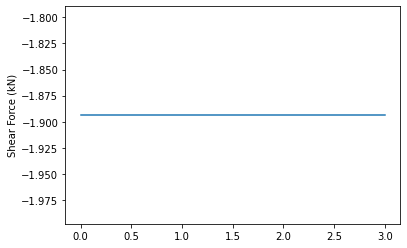

Bending Moment Diagram for Element 1


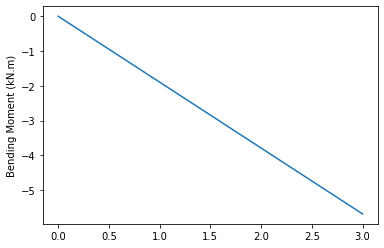

Shear Force Diagram for Element 2


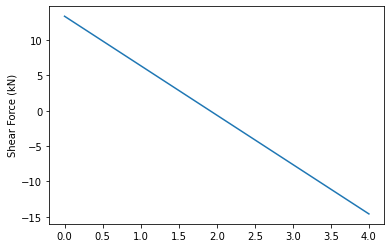

Bending Moment Diagram for Element 2


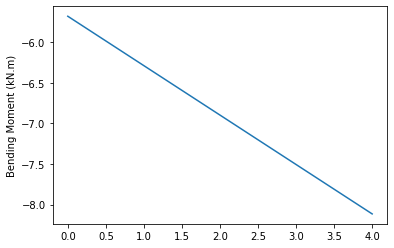

Shear Force Diagram for Element 3


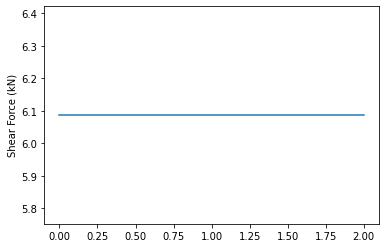

Bending Moment Diagram for Element 3


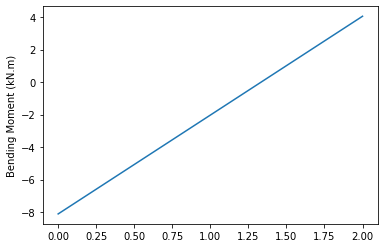

In [24]:
## SFD and BMD

for i in range(len(f)):
    print("Shear Force Diagram for Element "+ str(i+1))
    BeamElementShearDiagram(f[i],length[i])
    print("Bending Moment Diagram for Element "+ str(i+1))
    BeamElementMomentDiagram(f[i],length[i])
    